#LabWeek9: Prevent Overfitting - Part I

## Importing Dataset: IMDB

In [1]:
from keras.datasets import imdb
import numpy as np

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)
# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


**Note:** We first encountered this dataset in `LabWeek5`. You can refer to that notebook for clarification on the text-to-numbers decoding process. Through vectorizing process we turn text data into vectors.

**Perform some sanity checks on the dataset:** For example, find the `shape` of the dataset and print samples to make sense of the data.

In [5]:
#TODO: your code here
print("The shape of x_train" + str(x_train.shape))
print("The shape of y_train" + str(y_train.shape))
print("The shape of x_test" + str(x_test.shape))
print("The shape of y_test" + str(y_test.shape))

print(x_train[0][:20])
print(train_data[0])

The shape of x_train(25000, 10000)
The shape of y_train(25000,)
The shape of x_test(25000, 10000)
The shape of y_test(25000,)
[0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1.]
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18,

## Fighting overfitting -  Reducing the network's size


The general workflow to find an appropriate model size is to start with relatively few layers and
parameters, and start increasing the size of the layers or adding new layers until you see diminishing returns with regard to the
validation loss.



**Note:** we use `test set` as our `validation set`.

**Complete the following code for `original model` architecture**

In [6]:
from keras import models
from keras import layers

original_model = models.Sequential()
original_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))

#TODO: add one hidden layer with 16 units with proper activation function
original_model.add(layers.Dense(16, activation='relu'))

#TODO: add the output layer. Remember our task is binary classificaion, whether a review is 0:negative or 1:positive.
original_model.add(layers.Dense(1, activation='softmax'))

original_model.compile(optimizer='rmsprop',
                       loss='binary_crossentropy',
                       metrics=['acc'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
original_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │         160,016 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 160,305 (626.19 KB)

 Trainable params: 160,305 (626.19 KB)

 Non-trainable params: 0 (0.00 B)

**Define another model with fewer parameters. 4 units in each hidden layer.**

In [18]:
smaller_model = models.Sequential()
#TODO: add hidden/ouput layers and compile the smaller model
smaller_model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
smaller_model.add(layers.Dense(4, activation='relu'))
smaller_model.add(layers.Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



**Train (1) original_model and (2) smaller_model seperately for `epochs=20` and `batch_size=512`. Also pass `x_test` and `y_test` as `validation_data`.**

In [17]:
#TODO: your code here for training original_model
original_hist = original_model.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_test, y_test))

Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - acc: 0.4988 - loss: 0.0149 - val_acc: 0.5000 - val_loss: 0.6477
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - acc: 0.5028 - loss: 0.0115 - val_acc: 0.5000 - val_loss: 0.6755
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - acc: 0.4983 - loss: 0.0109 - val_acc: 0.5000 - val_loss: 0.7067
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - acc: 0.5041 - loss: 0.0086 - val_acc: 0.5000 - val_loss: 0.7308
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - acc: 0.5007 - loss: 0.0055 - val_acc: 0.5000 - val_loss: 0.8298
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - acc: 0.4948 - loss: 0.0063 - val_acc: 0.5000 - val_loss: 0.7812
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - acc: 0.5011 - loss: 0.0038 - val_acc: 0.5000 - val_loss: 0.8079
Epoch 8/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - acc: 0.4938 - loss: 0.0045 - val_acc: 0.5000 - val_loss: 0.8324
Epoch 9/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - acc: 0.5006

In [22]:
#TODO: your code here for training original_model
smaller_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy'])
smaller_hist = smaller_model.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_test, y_test))

Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 8s 132ms/step - accuracy: 0.5616 - loss: 0.6685 - val_accuracy: 0.8031 - val_loss: 0.5505
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.8550 - loss: 0.4887 - val_accuracy: 0.8697 - val_loss: 0.3922
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.8977 - loss: 0.3304 - val_accuracy: 0.8821 - val_loss: 0.3217
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9164 - loss: 0.2559 - val_accuracy: 0.8868 - val_loss: 0.2951
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9293 - loss: 0.2155 - val_accuracy: 0.8873 - val_loss: 0.2866
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.9426 - loss: 0.1846 - val_accuracy: 0.8886 - val_loss: 0.2820
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9468 - loss: 0.1663 - val_accuracy: 0.8873 - val_loss: 0.2851
Epoch 8/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9525 - loss: 0.1491 - val_accuracy: 0.8848 - 

**`orginal_hist` and `smaller_hist` are `objects` returned after training the models.**
- We can get access to the `history` attribute of `origial_hist` object through dot operator.
- TODO: The history attribute is a data structure of type `dictionary` containing data about everything that happened during training. Show the `keys` of this `dictionary`.

In [23]:
print(original_hist.history)
#TODO: print out the keys of the output dictionary
#your code here
print(original_hist.history.keys())
original_validation_loss = original_hist.history['val_loss']
original_loss = original_hist.history['val_acc']
print(original_validation_loss)

small_model_validation_loss = smaller_hist.history['val_loss']
small_model_loss = smaller_hist.history["loss"]


{'acc': [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5], 'loss': [0.018205132335424423, 0.013358475640416145, 0.012008173391222954, 0.012611514888703823, 0.007647083606570959, 0.00736378226429224, 0.00514873955398798, 0.006369487382471561, 0.005634985864162445, 0.004602976609021425, 0.0016935669118538499, 0.003096648957580328, 0.0036901964340358973, 0.004007554147392511, 0.0008562141447328031, 0.003135562175884843, 0.0035357323940843344, 0.0005998185370117426, 0.0019328152993693948, 0.00047007613466121256], 'val_acc': [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5], 'val_loss': [0.6477050185203552, 0.6755473613739014, 0.7066686153411865, 0.7308104038238525, 0.829791247844696, 0.7812338471412659, 0.8078543543815613, 0.8324395418167114, 0.8537440896034241, 0.8745306134223938, 0.954545259475708, 0.9160839319229126, 0.9386746883392334, 0.9616434574127197, 0.9811016321182251, 0.99976921

**Plot `val_loss` vs. epochs for both models in one plot**

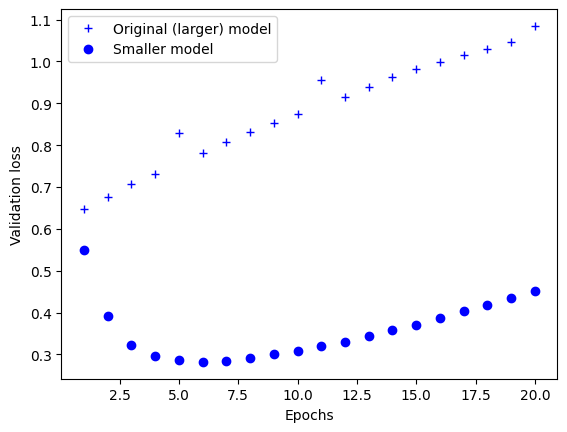

In [26]:
from matplotlib import pyplot as plt
#TODO: your code here
epochs = range(1, 21)
plt.plot(epochs, original_validation_loss, "b+", label="Original (larger) model")
plt.plot(epochs, small_model_validation_loss, "bo", label= "Smaller model")
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()
plt.show()

**Plot training `loss` vs. epochs for both models in one plot**

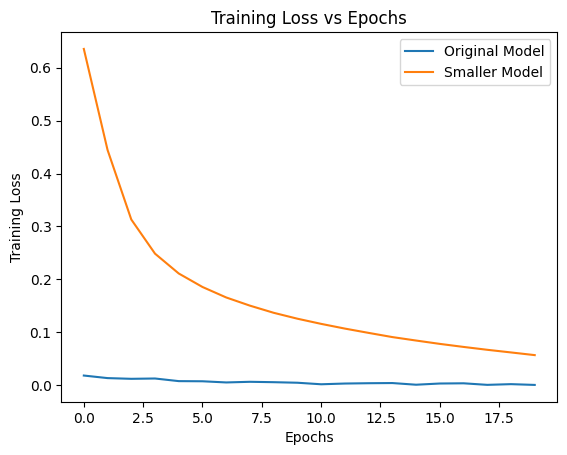

In [28]:
#TODO: your code hereß
plt.plot(original_hist.history['loss'], label='Original Model')
plt.plot(smaller_hist.history['loss'], label='Smaller Model')
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.legend()
plt.title('Training Loss vs Epochs')
plt.show()

**Questions:** Which model overfits earlier? How can you see the size of the model on overfitting?

**Answer:** TODO

**Now define a very large model (e.g., with 512 units in hidden layer) and compare the `loss` and `val_loss` of this big model and the `original model` and `smaller_model`.**

In [27]:
#your code here
biggest_model = models.Sequential()
biggest_model.add(layers.Dense(512, activation='relu', input_shape=(10000,)))
biggest_model.add(layers.Dense(512, activation='relu'))
biggest_model.add(layers.Dense(1, activation='sigmoid'))

biggest_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy'])
biggest_hist = biggest_model.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_test, y_test))
biggest_validation_loss = biggest_hist.history['val_loss']
biggest_loss = biggest_hist.history['loss']

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 8s 118ms/step - accuracy: 0.7683 - loss: 0.4577 - val_accuracy: 0.8814 - val_loss: 0.2956
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.9484 - loss: 0.1536 - val_accuracy: 0.8759 - val_loss: 0.3230
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.9846 - loss: 0.0564 - val_accuracy: 0.8668 - val_loss: 0.4680
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9987 - loss: 0.0084 - val_accuracy: 0.8689 - val_loss: 0.5675
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9998 - loss: 0.0020 - val_accuracy: 0.8708 - val_loss: 0.6809
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 1.0000 - loss: 2.8830e-04 - val_accuracy: 0.8702 - val_loss: 0.7259
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 1.0000 - loss: 1.4424e-04 - val_accuracy: 0.8702 - val_loss: 0.7587
Epoch 8/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 1.0000 - loss: 9.8175e-05 - val_accurac

**Discuss the results**

**Answer:** TODO

## Fighting overfitting - Adding weight regularization


A common way to mitigate overfitting is to put constraints on the complexity
of a network by forcing its weights to only take small values. This is called
"weight regularization", and it is done by adding to the loss function of the network a _cost_ associated with having large weights. This
cost comes in two flavors:

* L1 regularization, where the cost added is proportional to the _absolute value of the weights coefficients_ (i.e. to what is called the
"L1 norm" of the weights).
* L2 regularization, where the cost added is proportional to the _square of the value of the weights coefficients_ (i.e. to what is called
the "L2 norm" of the weights). L2 regularization is also called _weight decay_ in the context of neural networks. Don't let the different
name confuse you: weight decay is mathematically the exact same as L2 regularization.

In Keras, weight regularization is added by passing _weight regularizer instances_ to layers as keyword arguments.


**Complere the model below**

In [29]:
from keras import regularizers

l2_model = models.Sequential()
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu', input_shape=(10000,)))

#TODO: Add a dense layer with 16 unuts with L2 regularization

l2_model.add(layers.Dense(1, activation='sigmoid'))

In [30]:
l2_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['acc'])

`l2(0.001)` means that every coefficient in the weight matrix of the layer will add `0.001 * weight_coefficient_value` to the total loss of
the network. Note that because this penalty is _only added at training time_, the loss for this network will be much higher at training
than at test time.



**Train the model with regularization and compare the validation loss between this model and the `original_model` and `smaller model`.**

In [32]:
#TODO: your code here
big_and_regularized = models.Sequential()
big_and_regularized.add(layers.Dense(512, kernel_regularizer=regularizers.l2(0.001), activation='relu', input_shape=(10000,)))
big_and_regularized.add(layers.Dense(1, activation='sigmoid'))
big_and_regularized.compile(optimizer='adam',
                            loss='binary_crossentropy',
                            metrics=['accuracy'])
big_and_regularized_hist = big_and_regularized.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_test, y_test))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 8s 115ms/step - accuracy: 0.7874 - loss: 0.9927 - val_accuracy: 0.8806 - val_loss: 0.4343
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.9200 - loss: 0.3415 - val_accuracy: 0.8796 - val_loss: 0.3941
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.9192 - loss: 0.3138 - val_accuracy: 0.8812 - val_loss: 0.3854
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.9247 - loss: 0.2965 - val_accuracy: 0.8773 - val_loss: 0.3822
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.9253 - loss: 0.2901 - val_accuracy: 0.8752 - val_loss: 0.3892
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9264 - loss: 0.2919 - val_accuracy: 0.8756 - val_loss: 0.3794
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9312 - loss: 0.2754 - val_accuracy: 0.8765 - val_loss: 0.3803
Epoch 8/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.9316 - loss: 0.2737 - val_accuracy: 0.8768 - 

**Note:** As alternatives to L2 regularization, you could use one of the following Keras weight regularizers:

In [33]:
from keras import regularizers

# L1 regularization
regularizers.l1(0.001)

# L1 and L2 regularization at the same time
regularizers.l1_l2(l1=0.001, l2=0.001)

## Recap

To recap: here the most common ways to prevent overfitting in neural networks:

* Getting more training data.
* Reducing the capacity of the network.
* Adding weight regularization.
* Adding dropout. (next session)

**Observation 1:** The bigger network gets its training loss near zero very quickly. The more capacity the network has, the quicker it will be
able to model the training data (resulting in a low training loss), but the more susceptible it is to overfitting (resulting in a large
difference between the training and validation loss).

**Observation 2:** The model with L2 regularization has become much more resistant to overfitting than the reference model,
even though both models have the same number of parameters.